### Import libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Import the data

In [68]:
file_path = r"C:\Users\PC\Desktop\Moringa\Phase_2\Group-5-phase-2-project\Data\kc_house_data.csv"
df = pd.read_csv(file_path)
df.head() #viewing the first 5 rows of the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Conducting EDA

In [69]:
# Columns to drop
columns_to_drop = ['id','date', 'view','sqft_living','sqft_lot','sqft_above', 'sqft_basement', 
                   'yr_renovated','yr_built', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15']

# Drop the specified columns
house_df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been dropped
house_df.head()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,zipcode
0,221900.0,3,1.00,1.0,NaN,3,7,98178
1,538000.0,3,2.25,2.0,0.0,3,7,98125
2,180000.0,2,1.00,1.0,0.0,3,6,98028
3,604000.0,4,3.00,1.0,0.0,5,7,98136
4,510000.0,3,2.00,1.0,0.0,3,8,98074


In [70]:
#EDA and Data cleaning
print(f"NULL VALUES: {house_df.isna().sum()}")

# Display summary statistics
print(f"SUMMARY STATISTICS: {house_df.describe()}")

NULL VALUES: price            0
bedrooms         0
bathrooms        0
floors           0
waterfront    2376
condition        0
grade            0
zipcode          0
dtype: int64
SUMMARY STATISTICS:               price      bedrooms     bathrooms        floors    waterfront  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  19221.000000   
mean   5.402966e+05      3.373200      2.115826      1.494096      0.007596   
std    3.673681e+05      0.926299      0.768984      0.539683      0.086825   
min    7.800000e+04      1.000000      0.500000      1.000000      0.000000   
25%    3.220000e+05      3.000000      1.750000      1.000000      0.000000   
50%    4.500000e+05      3.000000      2.250000      1.500000      0.000000   
75%    6.450000e+05      4.000000      2.500000      2.000000      0.000000   
max    7.700000e+06     33.000000      8.000000      3.500000      1.000000   

          condition         grade       zipcode  
count  21597.000000  21597.000000  21597

In [71]:
print(house_df['waterfront'].dtype)
# Check unique values in the 'waterfront' column
print(house_df['waterfront'].unique())

float64
[nan  0.  1.]


In [72]:
#check mode and select the first mode [0]
waterfront_mode = house_df['waterfront'].mode()[0]
waterfront_mode

0.0

In [73]:
# Impute missing values with the mode of the 'waterfront' column
house_df['waterfront'] = house_df['waterfront'].fillna(waterfront_mode)


In [74]:
#Check for duplicate rows
duplicates = house_df.duplicated()

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# View duplicate rows
duplicate_rows = house_df[duplicates]
duplicate_rows.head()

Number of duplicate rows: 508


,price,bedrooms,bathrooms,floors,waterfront,condition,grade,zipcode
1094,435000.0,3,2.50,2.0,0.0,3,7,98053
1810,439000.0,4,2.25,2.0,0.0,3,8,98011
2194,360000.0,4,2.50,2.0,0.0,3,8,98038
2400,322500.0,4,2.50,2.0,0.0,3,7,98038
2510,390000.0,3,1.75,1.0,0.0,3,7,98019


In [75]:
# Drop duplicate rows
house_df_cleaned = house_df.drop_duplicates()

# Verify the changes
print(f"Number of rows before dropping duplicates: {len(house_df)}")
print(f"Number of rows after dropping duplicates: {len(house_df_cleaned)}")

Number of rows before dropping duplicates: 21597
Number of rows after dropping duplicates: 21089


### Regression statsmodels. 

In [94]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula 
f = 'price~bedrooms+bathrooms+floors+waterfront+condition+grade+zipcode'
# create a fitted model in one line
model = smf.ols(formula=f, data= house_df_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     3400.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:01:14   Log-Likelihood:            -2.9235e+05
No. Observations:               21089   AIC:                         5.847e+05
Df Residuals:                   21081   BIC:                         5.848e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.868e+07   3.29e+06    -17.843      0.000   -6.51e+07   -5.22e+07
bedrooms    1.322e+04   2214.530      5.971      0.000    8881.749    1.76e+04
bathrooms   8.244e+04   3502.155     23.540      0.000    7.56e+04    8.93e+04
floors     -4.937e+04   3933.787    -12.550      0.000   -5.71e+04   -4.17e+04
waterfront  9.013e+05   2.12e+04     42.497      0.000     8.6e+05    9.43e+05
condition   6.797e+04   2782.464     24.428      0.000    6.25e+04    7.34e+04
grade       1.857e+05   2040.942     90.980      0.000    1.82e+05     1.9e+05
zipcode      585.3770     33.506     17.471      0.000     519.702     651.052
==============================================================================
Omnibus:                    17643.814   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1526879.276
Skew:                           3.524   Prob(JB):                         0.00
Kurtosis:                      44.085   Cond. No.                     1.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Categorical variables. 
### plotting scatter plots to see the linearity of the scatter pots so as to identify cartegorical variables



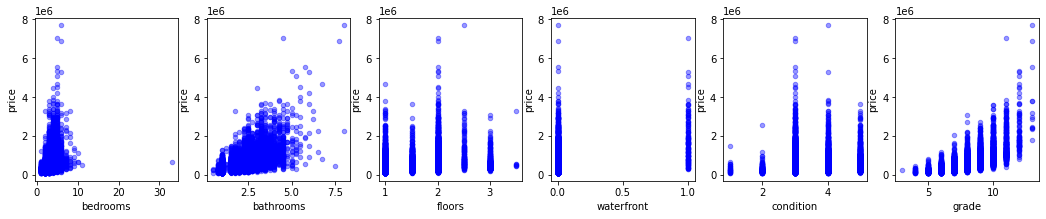

In [97]:
fig, axes = plt.subplots(nrows=1, ncols= 6, figsize=(18,3 ))

for xcol, ax in zip (['bedrooms','bathrooms','floors','waterfront','condition','grade',],axes):
    house_df_cleaned.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='blue')


From this we learn that, bedrooms and bathrooms may have some linearity function. Floors, waterfront, condition , grade and zipcode are cartegorical variables, for it is harder to form a straight line

In [98]:
#Now lets form dummies for the cartegorical variables.
floors_dummies= pd.get_dummies(house_df_cleaned['floors'], prefix = 'flr', drop_first= True)
waterfront_dummies= pd.get_dummies(house_df_cleaned['waterfront'], prefix = 'wtf', drop_first= True)
condition_dummies= pd.get_dummies(house_df_cleaned['condition'], prefix = 'cdt', drop_first= True)
grade_dummies= pd.get_dummies(house_df_cleaned['grade'], prefix = 'grd', drop_first= True)


In [99]:
#we then form a dataframe with the new columns
house_df_categorical= house_df_cleaned.drop(['floors','waterfront','condition','grade'], axis=1)
house_df_categorical= pd.concat ( [ house_df_categorical, floors_dummies, waterfront_dummies, condition_dummies, grade_dummies], axis=1)
house_df_categorical.head ()

,price,bedrooms,bathrooms,zipcode,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,wtf_1.0,...,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13
0,221900.0,3,1.00,98178,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,98125,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,98028,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,98136,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,98074,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [100]:
house_df_categorical.columns[0:]


Index(['price', 'bedrooms', 'bathrooms', 'zipcode', 'flr_1.5', 'flr_2.0',
       'flr_2.5', 'flr_3.0', 'flr_3.5', 'wtf_1.0', 'cdt_2', 'cdt_3', 'cdt_4',
       'cdt_5', 'grd_4', 'grd_5', 'grd_6', 'grd_7', 'grd_8', 'grd_9', 'grd_10',
       'grd_11', 'grd_12', 'grd_13'],
      dtype='object')

In [107]:
import statsmodels.formula.api as amf
f='price~bedrooms+bathrooms+zipcode+flr_1.5+flr_2.0+flr_2.5+flr_3.0+flr_3.5+wtf_1.0+cdt_2+cdt_3+cdt_4+cdt_5+grd_4+grd_5+grd_6+grd_7+grd_8+grd_9+grd_10+grd_11+grd_12+grd_13'
model = smf.ols(formula=f, data=house_df_categorical).fit()

SyntaxError: invalid syntax (<unknown>, line 1)